In [1]:
%%capture
from tqdm import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

from material.data import mnist_datagen

from v_0_cnn import *


In [2]:
train_gen, test_gen = mnist_datagen()

Shape of X [N, C, H, W]:  torch.Size([32, 1, 28, 28])
Shape of y:  torch.Size([32]) torch.int64 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])


In [3]:
net = CNN()

In [4]:
net.train()
for batch_idx, (x, y) in tqdm(enumerate(train_gen), total=len(train_gen)):
    net.optimizer.zero_grad()
    y_pred = net(x)
    print(y.shape)
    print(y_pred.shape)
    net.loss(y_pred, y).backward()
    net.optimizer.step()
    break

  0%|          | 0/1875 [00:00<?, ?it/s]

torch.Size([32])
torch.Size([32, 10])


In [5]:
model = PytorchNN()
model.to("cuda")

PytorchNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [6]:
losses = []
n_epochs = 12
for _ in range(1, n_epochs):
    model.fit_datagen(train_gen)
    loss = model.eval_datagen(test_gen)
    losses.append(loss)

  1%|          | 14/1875 [00:00<00:13, 138.30it/s]


Test set: Average loss: 1.1313, Accuracy: 8071/10000 (81%)



  1%|          | 14/1875 [00:00<00:13, 137.12it/s]


Test set: Average loss: 0.5568, Accuracy: 8657/10000 (87%)



  1%|          | 15/1875 [00:00<00:13, 141.11it/s]


Test set: Average loss: 0.4226, Accuracy: 8874/10000 (89%)



  1%|          | 14/1875 [00:00<00:13, 137.47it/s]


Test set: Average loss: 0.3661, Accuracy: 9018/10000 (90%)



  1%|          | 15/1875 [00:00<00:13, 141.53it/s]


Test set: Average loss: 0.3319, Accuracy: 9097/10000 (91%)



  1%|          | 15/1875 [00:00<00:13, 141.38it/s]


Test set: Average loss: 0.3083, Accuracy: 9149/10000 (91%)



  1%|          | 14/1875 [00:00<00:13, 133.55it/s]


Test set: Average loss: 0.2914, Accuracy: 9178/10000 (92%)



  1%|          | 14/1875 [00:00<00:13, 137.16it/s]


Test set: Average loss: 0.2767, Accuracy: 9212/10000 (92%)



  1%|          | 14/1875 [00:00<00:13, 137.86it/s]


Test set: Average loss: 0.2653, Accuracy: 9231/10000 (92%)



  1%|          | 14/1875 [00:00<00:13, 139.02it/s]


Test set: Average loss: 0.2539, Accuracy: 9269/10000 (93%)



100%|██████████| 1875/1875 [00:13<00:00, 139.81it/s]



Test set: Average loss: 0.2447, Accuracy: 9286/10000 (93%)



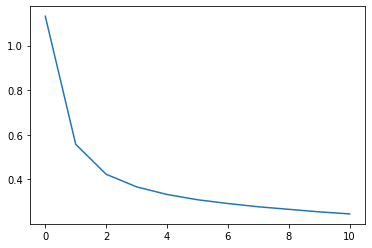

In [7]:
plt.plot(losses)